In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('C:/ASM/DevData/eating/data/steven_uva_lab_data_combined.pkl', 'rb') as file:
        data = pickle.load(file)

In [17]:
subject_count =len(data)
print("Subject count: ", subject_count)

total_sess = 0
duration = 0
total_annots, total_bites, total_sips = 0, 0 , 0
diffs = np.empty((0,))
xyz = np.empty((0, 3))

for subject in range(subject_count):#subject_count
    sess_count = len(data[subject])
    total_sess+=sess_count
    for sess in range(sess_count):
        d= data[subject][sess]["data"]
        a = data[subject][sess]["annots"]
        
        duration += d[-1,0]
        b = np.sum(a[:, 1]==1)
        s = np.sum(a[:, 1]==2)        
        
        total_annots += len(a)
        total_bites += b
        total_sips += s
        
        df = a[1:, 0] - a[:-1, 0]
        diffs = np.concatenate((diffs, df))
        xyz = np.concatenate((xyz, d[a[:,0], 1:4]), axis=0)
        

diffs = diffs/16
d = duration/total_sess/60

print(total_annots, total_bites, total_sips)
print(d)
    
    

Subject count:  28
3842 2955 887
111.1271286231884


In [28]:
x = xyz[:,0]
print("Total: ", xyz.shape)
for th in np.arange(0, 1.05, 0.1):
    th = int(th*100)/100
    print("X threshold {}, Count: {}".format(th, np.sum(x<=-th)))

Total:  (3842, 3)
X threshold 0.0, Count: 3813
X threshold 0.1, Count: 3761
X threshold 0.2, Count: 3699
X threshold 0.3, Count: 3610
X threshold 0.4, Count: 3367
X threshold 0.5, Count: 2962
X threshold 0.6, Count: 2383
X threshold 0.7, Count: 1749
X threshold 0.8, Count: 951
X threshold 0.9, Count: 184
X threshold 1.0, Count: 0


In [ ]:
3367/3813

In [18]:
a = diffs[diffs<60]
b = diffs[diffs<2]
print(len(diffs), len(a), len(b))
100*39/3796
100*3593/3796

3796 3593 39


94.6522655426765

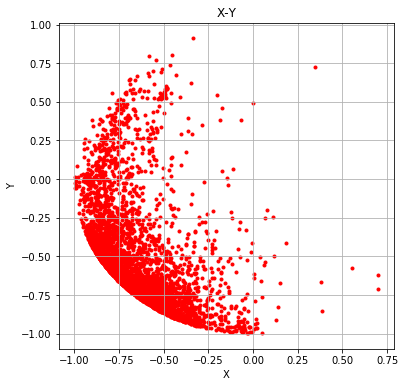

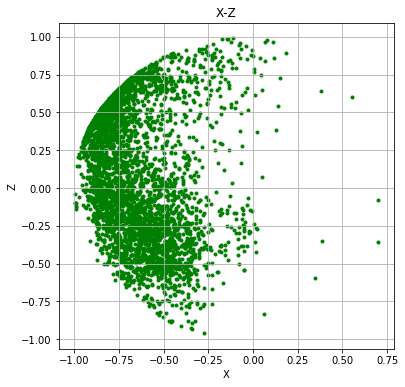

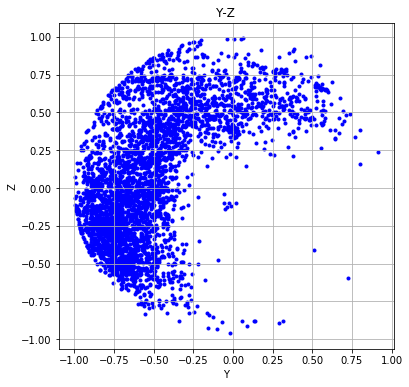

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(xyz[:, 0], xyz[:,1], marker='.', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X-Y')
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(xyz[:, 0], xyz[:,2], marker='.', color='green')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('X-Z')
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(xyz[:, 1], xyz[:,2], marker='.', color='blue')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Y-Z')
plt.grid(True)
plt.show()

1.1327713382507905


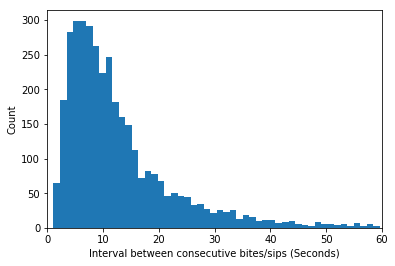

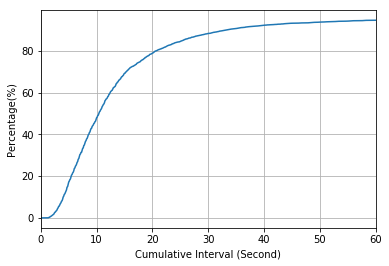

In [27]:
fig, ax = plt.subplots()
plt.hist(a, bins=50)
plt.xlim([0, 60])
plt.xlabel('Interval between consecutive bites/sips (Seconds)')
plt.ylabel('Count')

res = []
total = len(diffs)
for i in np.arange(0, 60.1, 0.1):
    c = diffs[diffs<=i]
    c = len(c)/total*100 
    #print(i, c)
    res.append([i, c])
    if i==2:
        print(c)

res = np.asarray(res)
fig, ax = plt.subplots()
plt.plot(res[:, 0], res[:, 1])
plt.xlim([0, 60])
plt.xlabel('Cumulative Interval (Second)')
plt.ylabel('Percentage(%)')
plt.grid(True)

In [10]:
combo = data
ds = np.empty((0, 6))
for subject in range(len(combo)):
    for sess in range(len(combo[subject])):
        print(subject, sess, " :: ", end="")
        d = combo[subject][sess]["data"][:, 4:]
        ds = np.concatenate((ds,d), axis=0)
        
print(ds.shape)

mu = np.mean(ds, axis=0)
sigma = np.std(ds, axis=0)
mu, sigma

0 0  :: 1 0  :: 2 0  :: 2 1  :: 3 0  :: 3 1  :: 4 0  :: 4 1  :: 5 0  :: 5 1  :: 6 0  :: 6 1  :: 7 0  :: 8 0  :: 9 0  :: 10 0  :: 11 0  :: 12 0  :: 13 0  :: 14 0  :: 15 0  :: 16 0  :: 17 0  :: 18 0  :: 19 0  :: 20 0  :: 21 0  :: 21 1  :: 22 0  :: 22 1  :: 22 2  :: 22 3  :: 23 0  :: 23 1  :: 24 0  :: 24 1  :: 25 0  :: 25 1  :: 25 2  :: 25 3  :: 26 0  :: 26 1  :: 26 2  :: 26 3  :: 26 4  :: 27 0  :: (4907420, 6)


(array([-4.45089863e-15,  4.84898739e-14,  8.74472154e-14, -2.81580182e-16,
         2.71981932e-15, -2.22915632e-16]), array([1., 1., 1., 1., 1., 1.]))